In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Data/Ecommerce_Customers.csv")

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## df.describe
 We can used this to see some descriptive analyisis of the data set. We can see that we have 500 records to work with. Small std suggest lower spread of data and minimal variance.

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


As we are looking to perform a linear regression which requires both variables to be continuous we will only be considering columns 3 onwards. The Yearly Amount spent is our target variable (the one which we would like to predict).

## Exploratory data analysis

Here we can start to explore which variables may have a relationship with the target variable and so would be best in our model.

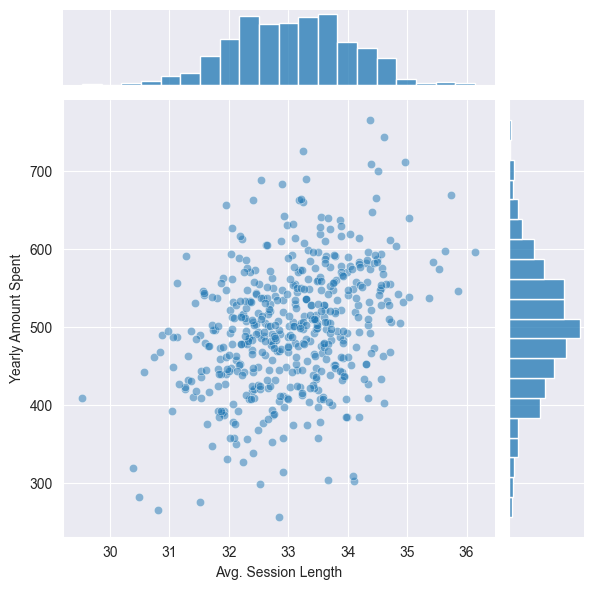

In [10]:
# Avg. Session length
sns.jointplot(x="Avg. Session Length", y="Yearly Amount Spent", data=df, alpha=0.5)

Instead of having to change this plot a number of times, lets create a new df and loop through to create a number of plots at once.

In [11]:
cont_df = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]]

In [14]:
cont_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


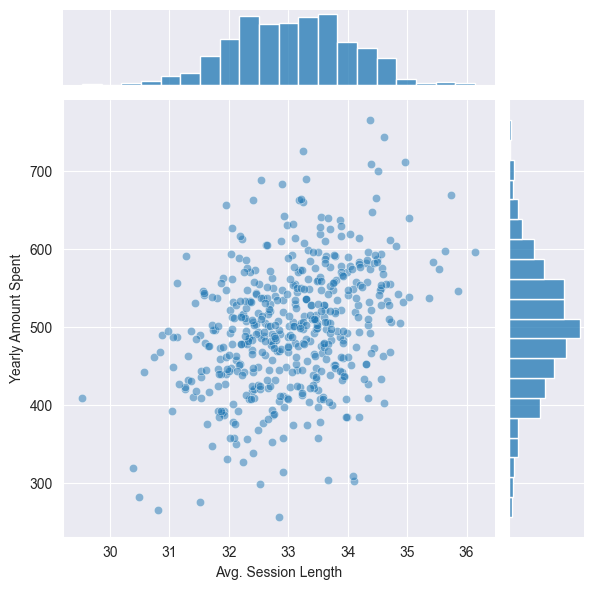

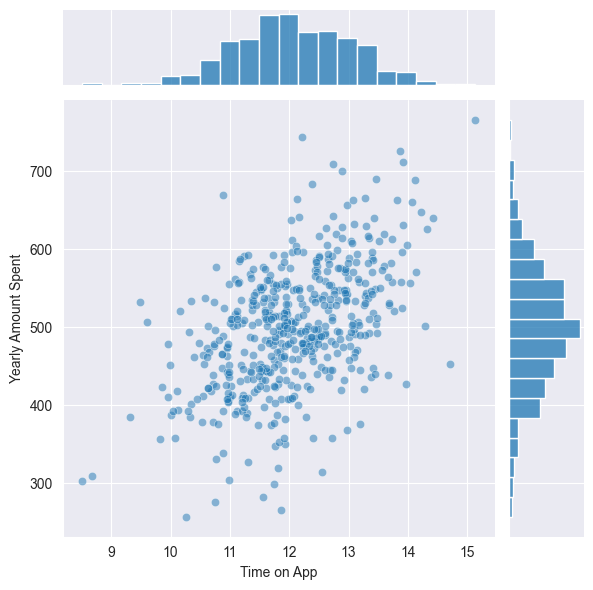

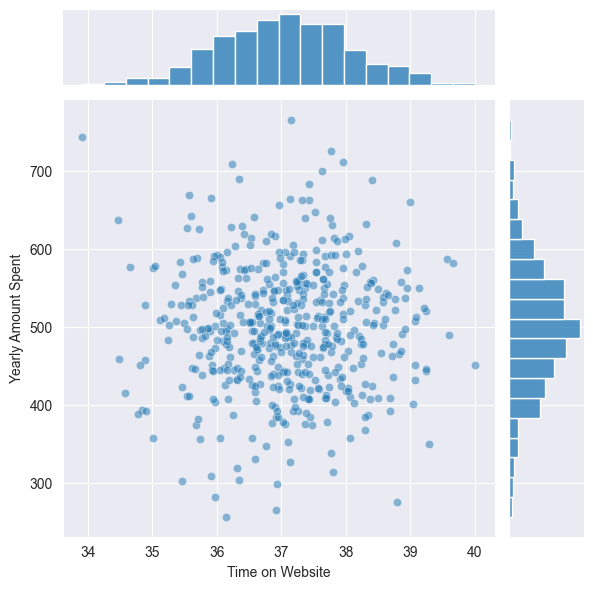

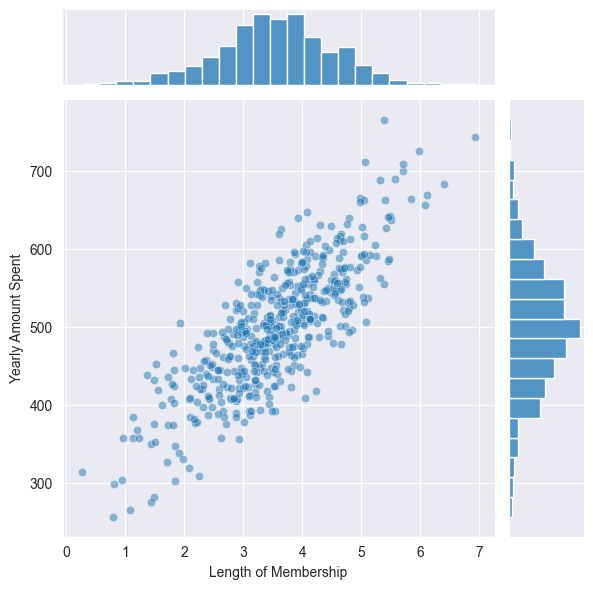

In [16]:
for col in cont_df:
    if col != "Yearly Amount Spent":
        sns.jointplot(x=col, y="Yearly Amount Spent", data=cont_df, alpha=0.5)

We can also use a pairplot to compare all of the variables within one plot, but this is not as useful if you have too many continous variables to compare.

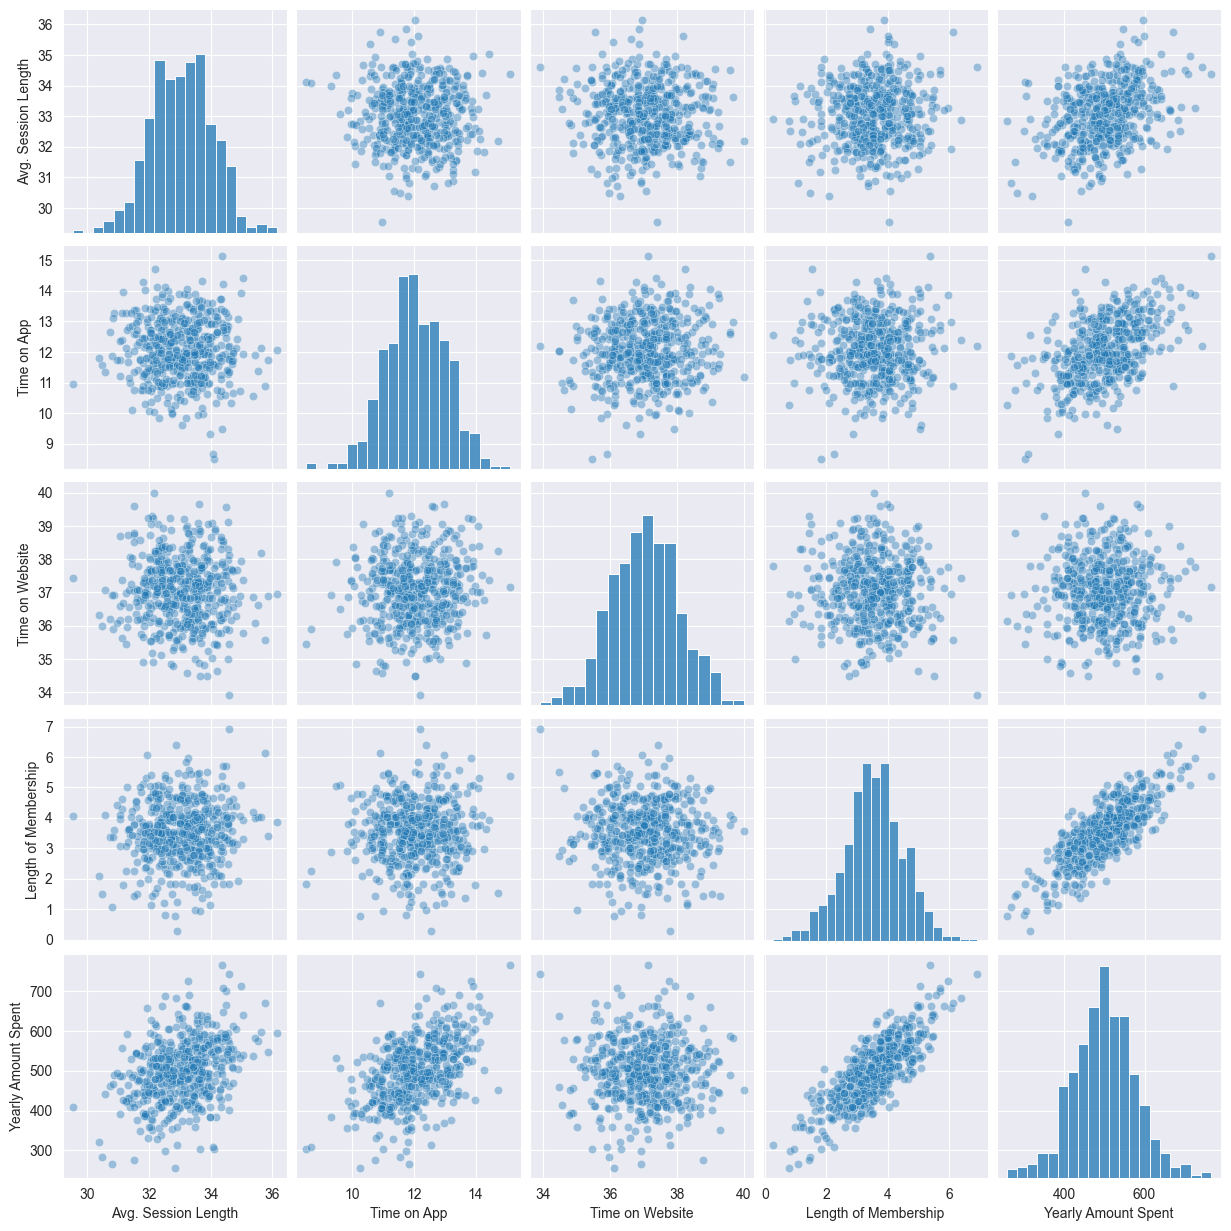

In [18]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4})

As we can see from the EDA there seems to be the strongest correlation between Length of membership and yearly spend followed by time on app. Thus we should preceed to use this variable as the predictor in our model. We can also test with time in app can improve the model using multiple linear regression.

## Model Building

In [19]:
#imports
from sklearn.model_selection import train_test_split

In [20]:
X = cont_df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = cont_df["Yearly Amount Spent"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [ ]:
## Training the model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

Model coefficients show us how important each feature is to the model. The higher the coefficient the more important that feature is to model performance.

In [25]:
lm.coef_

array([ 2.58218132e+01,  3.89812611e+01, -4.31660952e-03,  6.16928156e+01])

In [29]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
# X.columns labels the rows using the columns from the X variable
print(coef)

                      Coefficient
Avg. Session Length     25.821813
Time on App             38.981261
Time on Website         -0.004317
Length of Membership    61.692816


## Predictions

In [30]:
train_predict = lm.predict(X_train)

In [31]:
train_predict

array([472.75631511, 558.45880771, 504.40640226, 432.0102403 ,
       550.48489491, 569.76718449, 515.43391671, 537.8304441 ,
       481.02606011, 473.57654831, 476.80790252, 531.46454722,
       533.75001381, 407.41747748, 459.67786111, 581.18900786,
       455.57368006, 543.07937946, 448.74696714, 480.87706741,
       432.04274856, 685.79343387, 500.5962535 , 409.13408609,
       398.41713384, 464.96921358, 503.49967971, 449.63494846,
       559.62080472, 496.17129076, 477.63204176, 349.09851103,
       411.34270508, 494.03995765, 682.50160303, 580.60999363,
       388.95051218, 634.5870474 , 657.65876944, 676.54947484,
       379.4852192 , 425.83055099, 416.96842459, 478.96841581,
       548.15824166, 522.83544348, 425.06415967, 480.63607207,
       412.06647316, 503.43209556, 754.26143101, 569.31746851,
       456.6581024 , 588.87691234, 504.82412011, 477.72847737,
       493.99845604, 391.37626502, 548.24871952, 485.24745409,
       313.14174326, 539.78707151, 524.35483529, 434.41

In [32]:
test_predict = lm.predict(X_test)

In [33]:
test_predict

array([563.36342699, 588.9297977 , 569.75540566, 552.91071562,
       507.85692047, 516.06946138, 576.20199789, 389.29223371,
       543.23129456, 551.80021108, 559.17506905, 525.55682823,
       410.87582722, 652.04325096, 577.29848562, 494.81755116,
       616.62978324, 511.85919372, 396.65730055, 398.86756774,
       564.73883661, 491.75980517, 444.47384776, 435.09540452,
       454.94087296, 283.44398491, 519.1174957 , 601.69284048,
       506.31000113, 340.73409926, 504.50194957, 487.21238739,
       420.02013263, 499.92046302, 501.75924134, 523.81608347,
       512.31336457, 432.59491269, 468.20131044, 554.89555915,
       394.52906717, 558.66278008, 466.17867084, 593.81923064,
       278.62245532, 542.29441432, 507.17453951, 671.86638051,
       313.55516221, 619.44845886, 416.1521476 , 324.77789195,
       416.43552511, 437.8278253 , 516.75530581, 601.95439076,
       524.68952585, 672.51938461, 347.63319588, 489.90866256,
       507.85993159, 374.30175291, 456.78704175, 576.67

<Axes: ylabel='Yearly Amount Spent'>

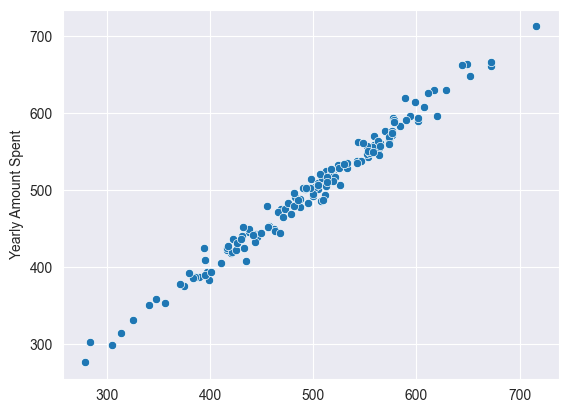

In [36]:
sns.scatterplot(x=test_predict, y=y_test)

<Axes: ylabel='Yearly Amount Spent'>

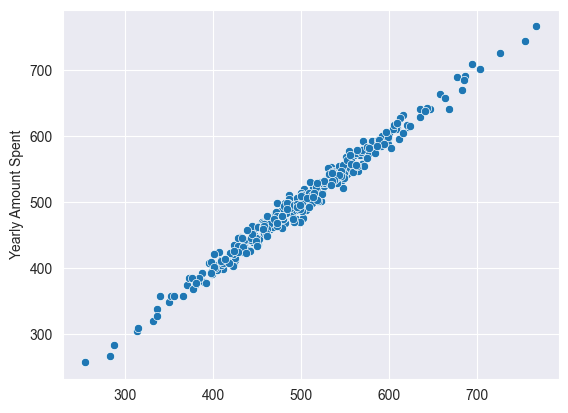

In [37]:
sns.scatterplot(x=train_predict, y=y_train)

## Model Evaluation

In [39]:
#import
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [40]:
print(f"MAE:{mean_absolute_error(y_test, test_predict)}")
print(f"MSE:{mean_squared_error(y_test, test_predict)}")
print(f"RMSE:{sqrt(mean_squared_error(y_test, test_predict))}")

MAE:8.100237183596452
MSE:106.14890318260102
RMSE:10.302858981011097


### Residuals

In unbiased predictions the residuals should be normally distributed. If not there are biases that need to be addressed.

In [44]:
residuals = y_test - test_predict

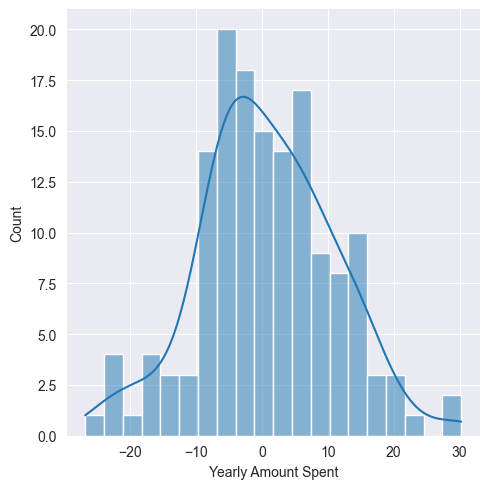

In [45]:
sns.displot(residuals, bins=20, kde=True)